In [24]:
student_data=read.csv("Student_Details.csv")
str(student_data)

names(student_data)

'data.frame':	200 obs. of  8 variables:
 $ StudentID             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                : chr  "Female" "Female" "Female" "Female" ...
 $ StudentName           : chr  "Parkavi" "Nithilaa" "Karunya v" "Anusha" ...
 $ Age                   : int  18 19 20 20 19 17 17 19 18 20 ...
 $ ParentsAnnualIncome.L.: int  10 8 10 10 6 6 3 3 5 4 ...
 $ HSCMarks              : int  84 89 78 82 67 92 93 83 71 63 ...
 $ Community             : chr  "OBC" "BC" "OBC" "MBC" ...
 $ ParentsOccupation     : chr  "Teacher" "Police" "Tailor" "Police" ...


[1] "StudentID"              "Gender"                 "StudentName"           
[4] "Age"                    "ParentsAnnualIncome.L." "HSCMarks"              
[7] "Community"              "ParentsOccupation"

In [25]:
head(student_data)
summary(student_data$Age)

,StudentID,Gender,StudentName,Age,ParentsAnnualIncome.L.,HSCMarks,Community,ParentsOccupation
,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,1,Female,Parkavi,18,10,84,OBC,Teacher
2,2,Female,Nithilaa,19,8,89,BC,Police
3,3,Female,Karunya v,20,10,78,OBC,Tailor
4,4,Female,Anusha,20,10,82,MBC,Police
5,5,Female,Nikkitha,19,6,67,SC,Driver
6,6,Female,Girija,17,6,92,BC,Teacher


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   18.00   19.00   18.52   19.00   20.00 

In [26]:
sd(student_data$Age)
summary(student_data$ParentsAnnualIncome.L.)
sd(student_data$ParentsAnnualIncome.L.)
summary(student_data$Age)

[1] 1.06066

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    6.00   11.00   14.55   23.25   35.00 

[1] 10.36555

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   18.00   19.00   18.52   19.00   20.00 

In [27]:
sd(student_data$HSCMarks)

[1] 10.56401

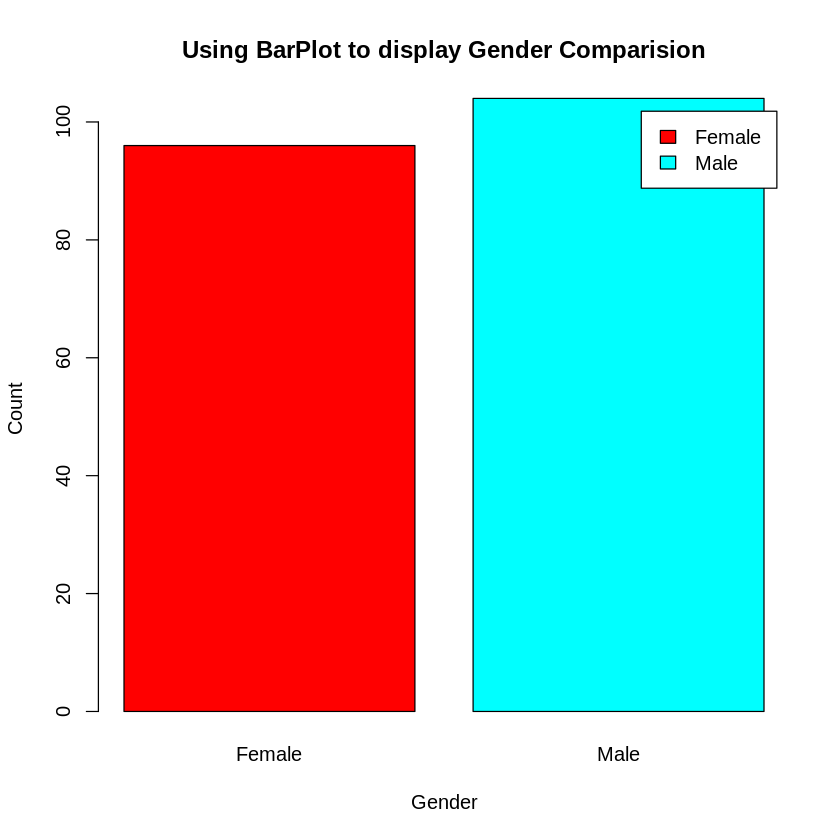

In [28]:
a=table(student_data$Gender)
barplot(a,main="Using BarPlot to display Gender Comparision",
       ylab="Count",
       xlab="Gender",
       col=rainbow(2),
       legend=rownames(a))

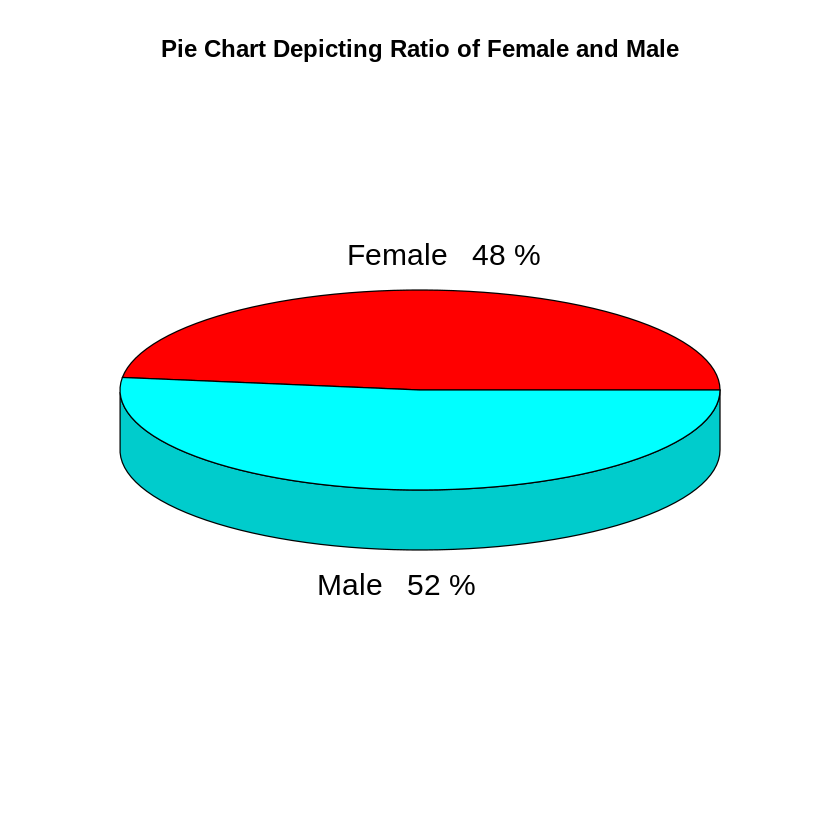

In [29]:
pct=round(a/sum(a)*100)
lbs=paste(c("Female","Male")," ",pct,"%",sep=" ")
library(plotrix)
pie3D(a,labels=lbs,
   main="Pie Chart Depicting Ratio of Female and Male")

In [14]:
install.packages("plotrix")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [30]:
summary(student_data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   18.00   19.00   18.52   19.00   20.00 

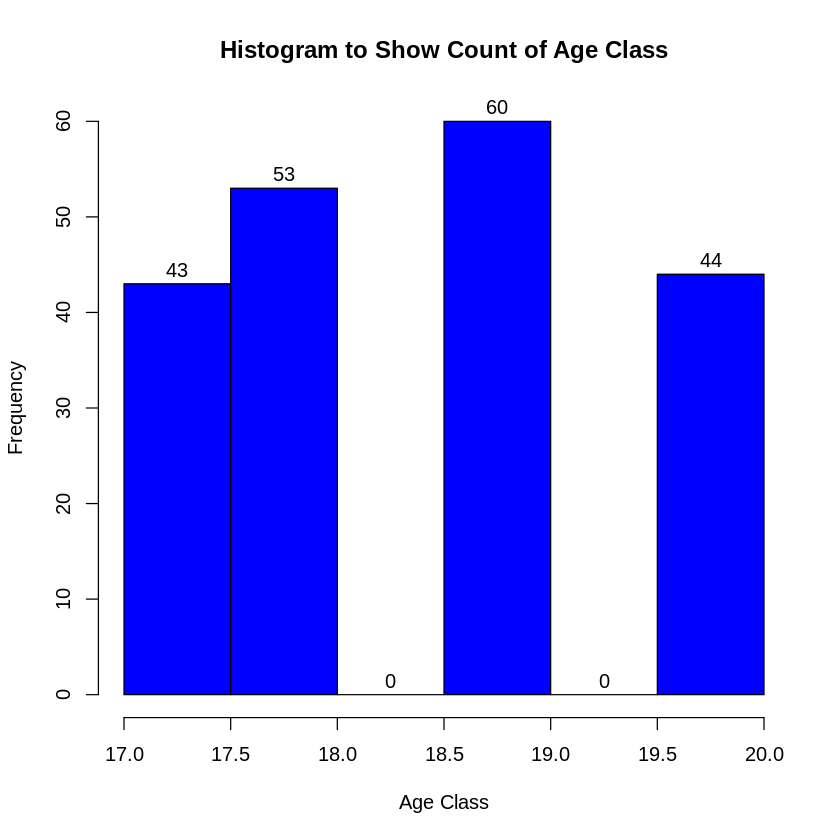

In [31]:
hist(student_data$Age,
    col="blue",
    main="Histogram to Show Count of Age Class",
    xlab="Age Class",
    ylab="Frequency",
    labels=TRUE)

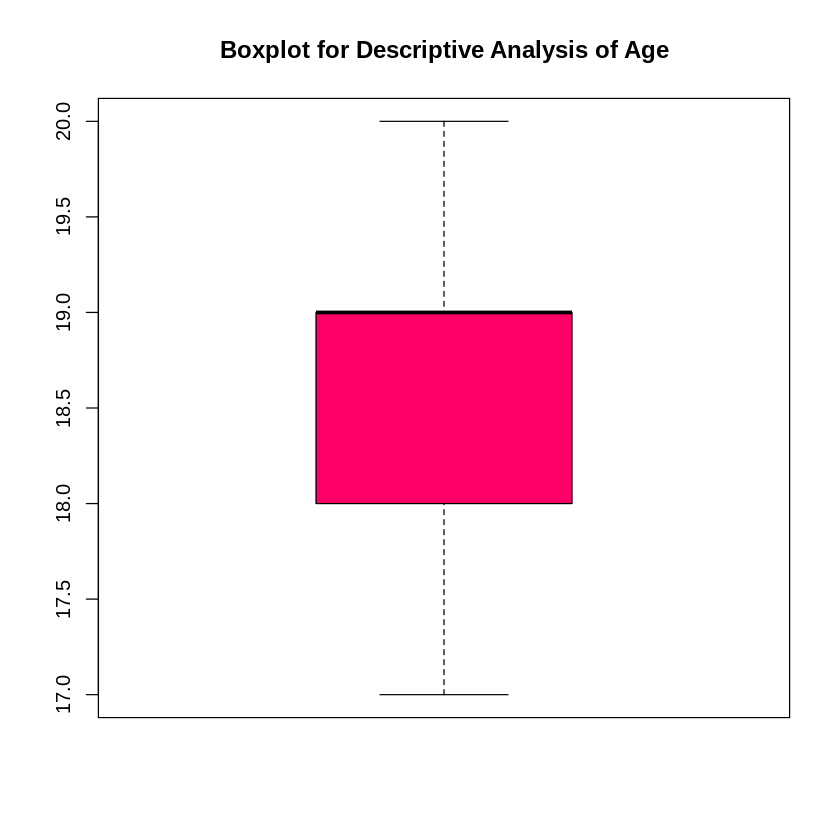

In [32]:
boxplot(student_data$Age,
       col="#ff0066",
       main="Boxplot for Descriptive Analysis of Age")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    6.00   11.00   14.55   23.25   35.00 

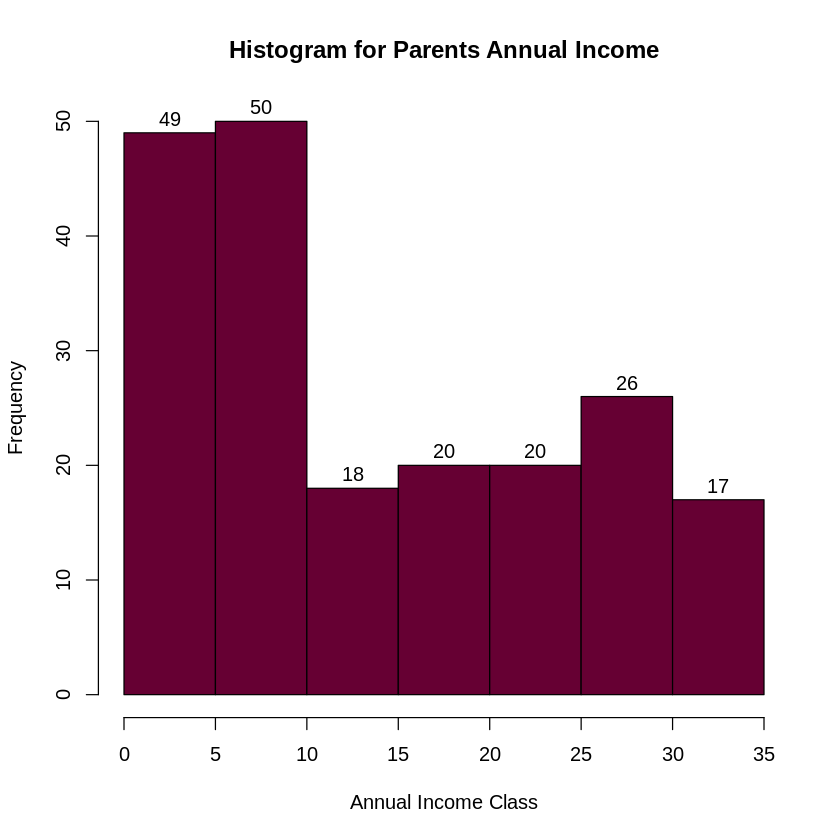

In [33]:
summary(student_data$ParentsAnnualIncome.L.)
hist(student_data$ParentsAnnualIncome.L.,
  col="#660033",
  main="Histogram for Parents Annual Income",
  xlab="Annual Income Class",
  ylab="Frequency",
  labels=TRUE)

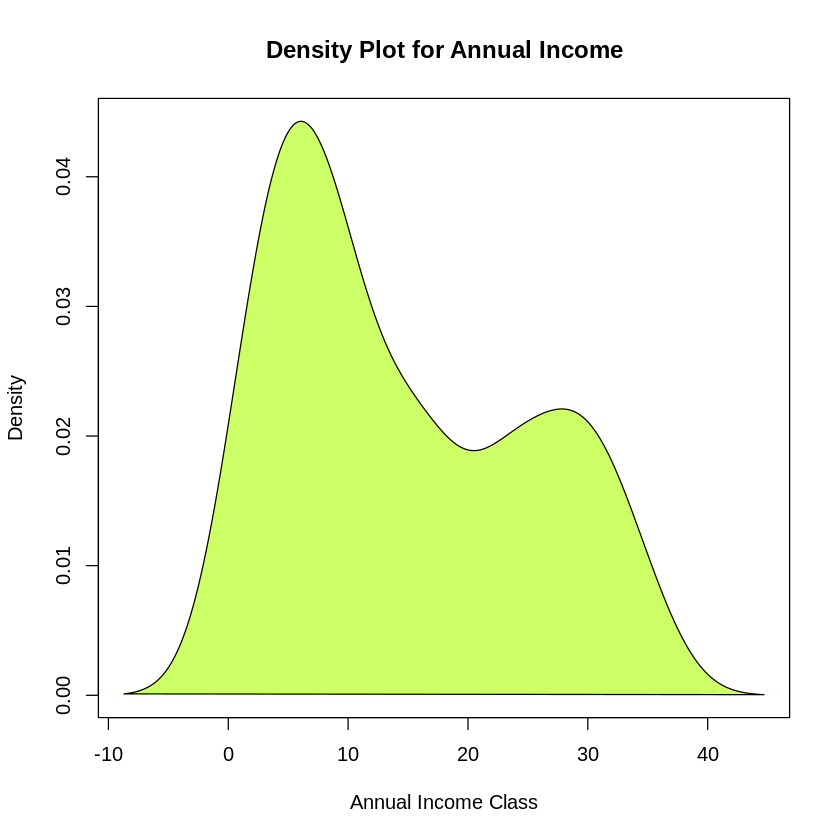

In [34]:
plot(density(student_data$ParentsAnnualIncome.L.),
    col="yellow",
    main="Density Plot for Annual Income",
    xlab="Annual Income Class",
    ylab="Density")
polygon(density(student_data$ParentsAnnualIncome.L.),
        col="#ccff66")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  60.00   66.75   76.00   76.36   85.25   95.00 

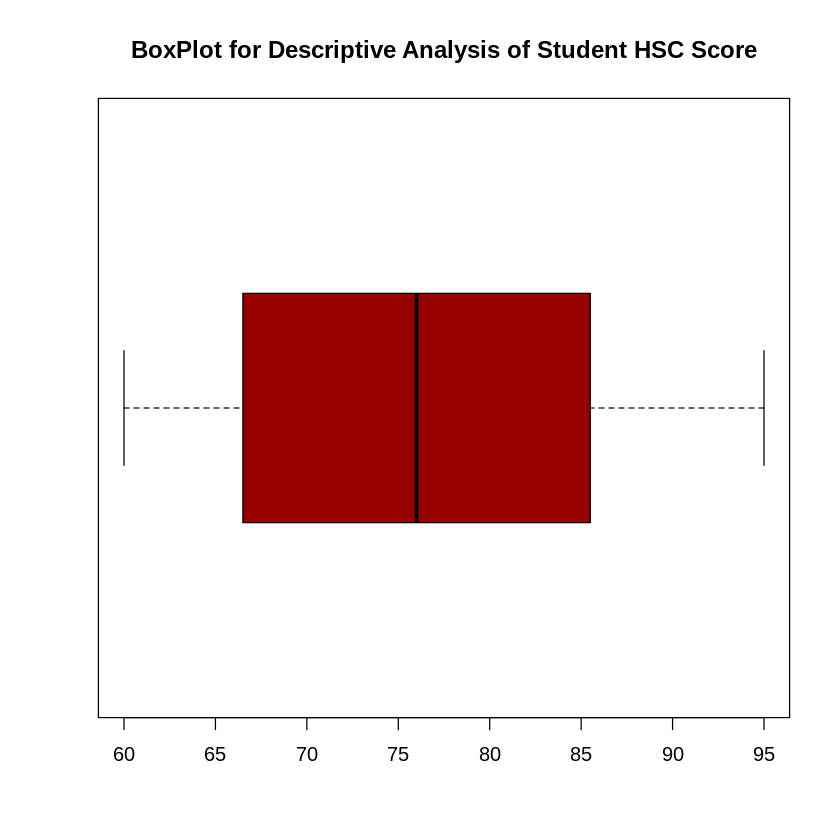

In [35]:
summary(student_data$HSCMarks)

##Min. 1st Qu. Median Mean 3rd Qu. Max. 
## 1.00 34.75 50.00 50.20 73.00 99.00

boxplot(student_data$HSCMarks,
   horizontal=TRUE,
   col="#990000",
   main="BoxPlot for Descriptive Analysis of Student HSC Score")

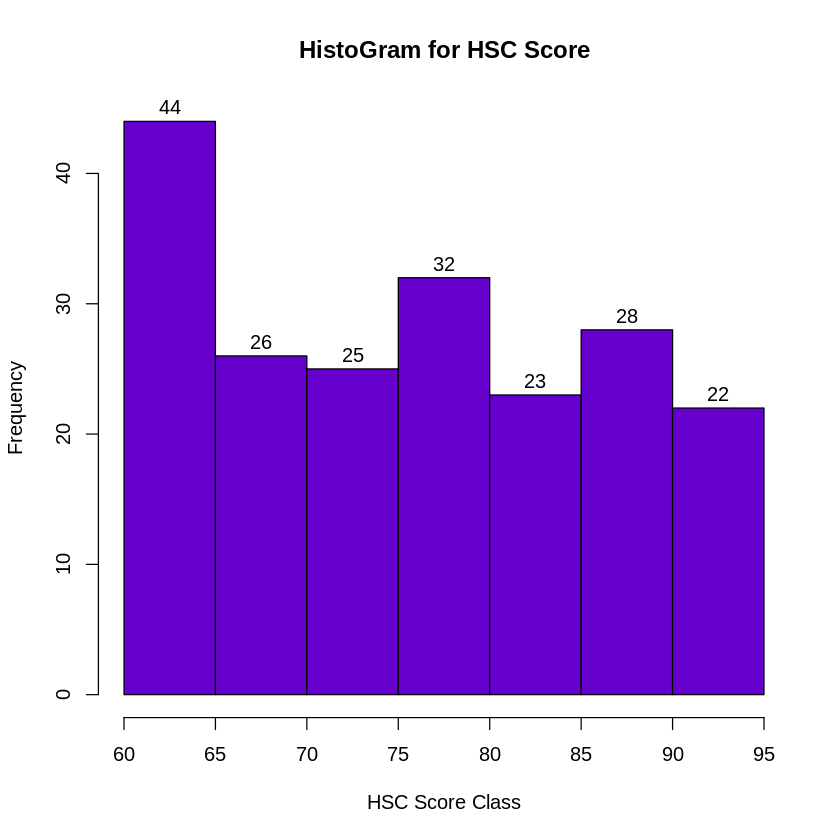

In [36]:
hist(student_data$HSCMarks,
    main="HistoGram for HSC Score",
    xlab="HSC Score Class",
    ylab="Frequency",
    col="#6600cc",
    labels=TRUE)

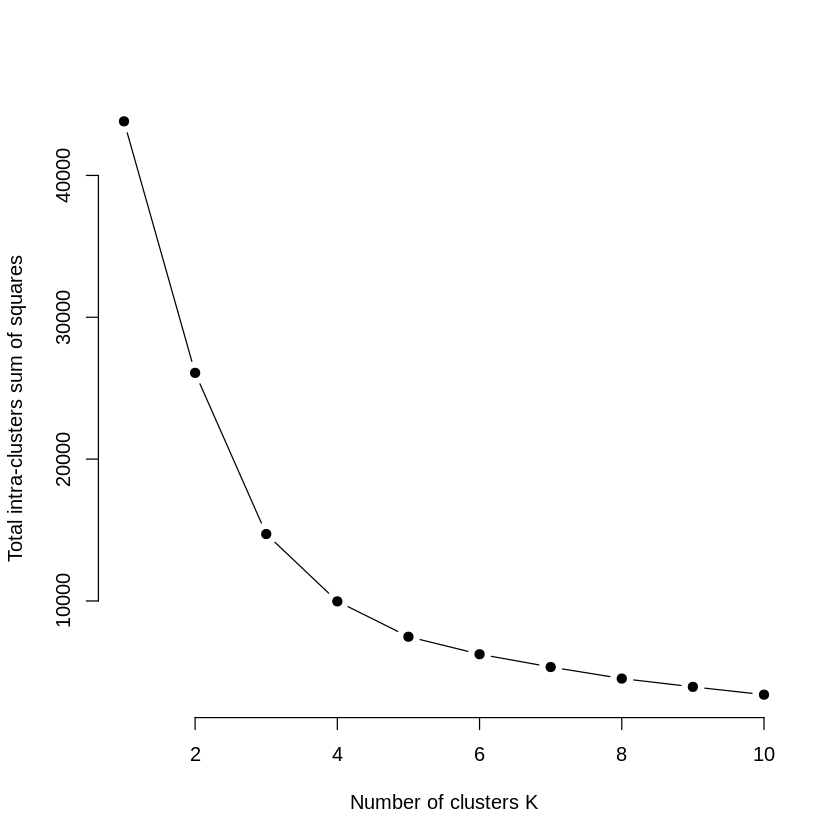

In [37]:
library(purrr)
set.seed(123)
# function to calculate total intra-cluster sum of square 
iss <- function(k) {
  kmeans(student_data[,4:6],k,iter.max=100,nstart=100,algorithm="Lloyd" )$tot.withinss
}

k.values <- 1:10


iss_values <- map_dbl(k.values, iss)

plot(k.values, iss_values,
    type="b", pch = 19, frame = FALSE, 
    xlab="Number of clusters K",
    ylab="Total intra-clusters sum of squares")

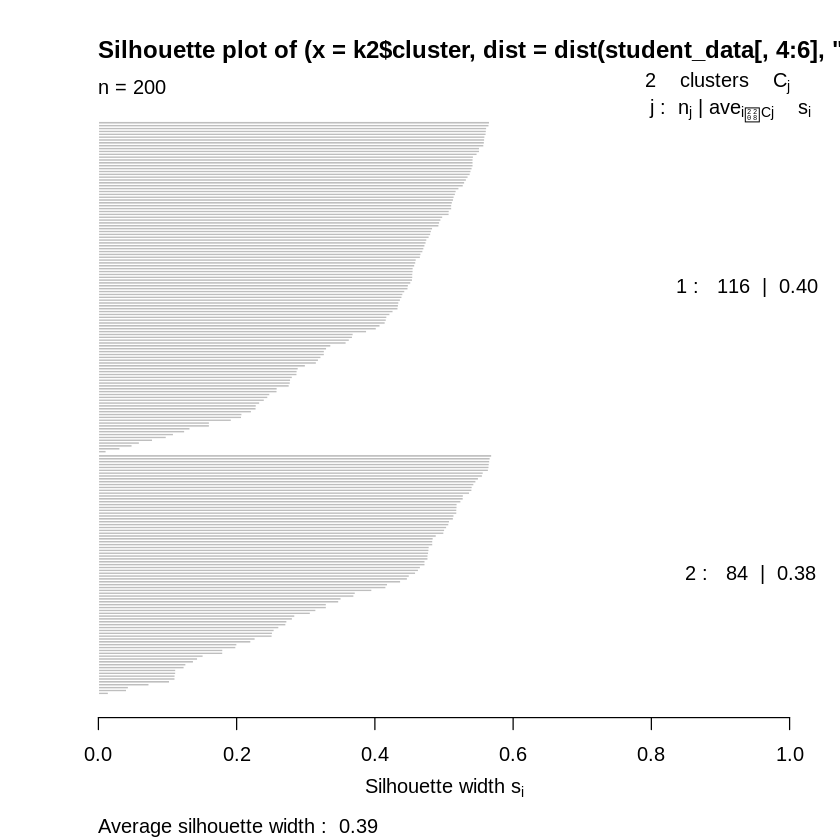

In [39]:
library(cluster) 
library(gridExtra)
library(grid)


k2<-kmeans(student_data[,4:6],2,iter.max=100,nstart=50,algorithm="Lloyd")
s2<-plot(silhouette(k2$cluster,dist(student_data[,4:6],"euclidean")))

In [38]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



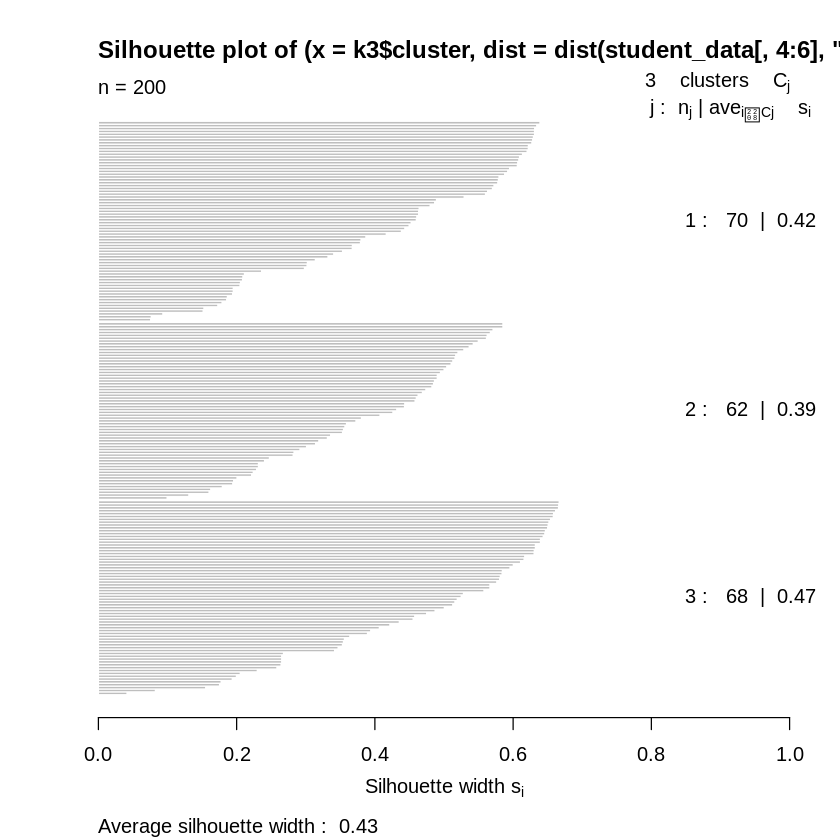

In [40]:
k3<-kmeans(student_data[,4:6],3,iter.max=100,nstart=50,algorithm="Lloyd")
s3<-plot(silhouette(k3$cluster,dist(student_data[,4:6],"euclidean")))

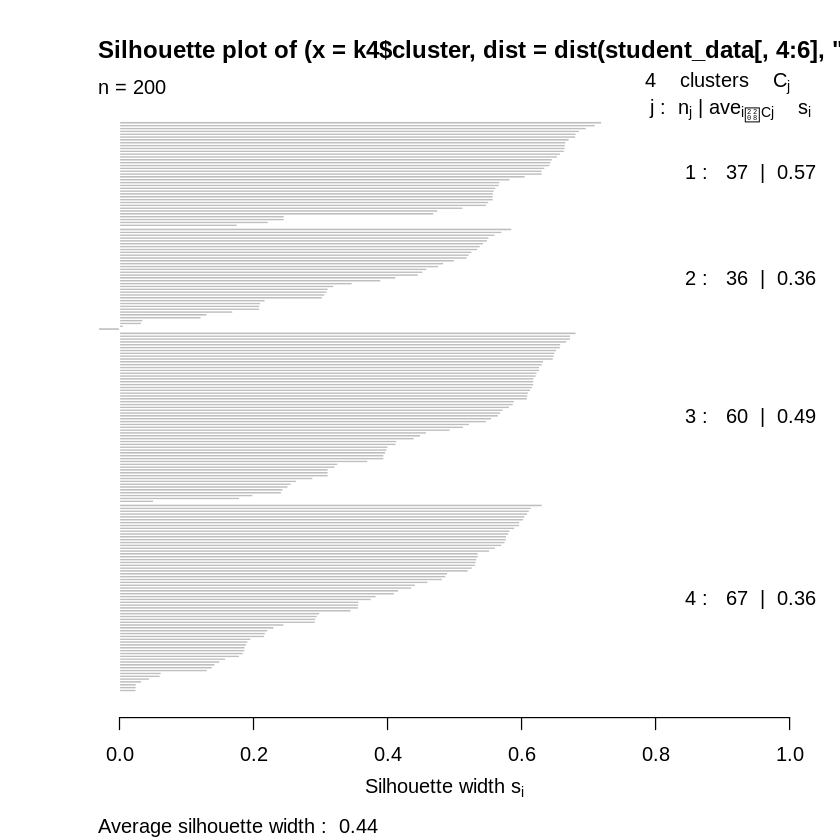

In [41]:
k4<-kmeans(student_data[,4:6],4,iter.max=100,nstart=50,algorithm="Lloyd")
s4<-plot(silhouette(k4$cluster,dist(student_data[,4:6],"euclidean")))

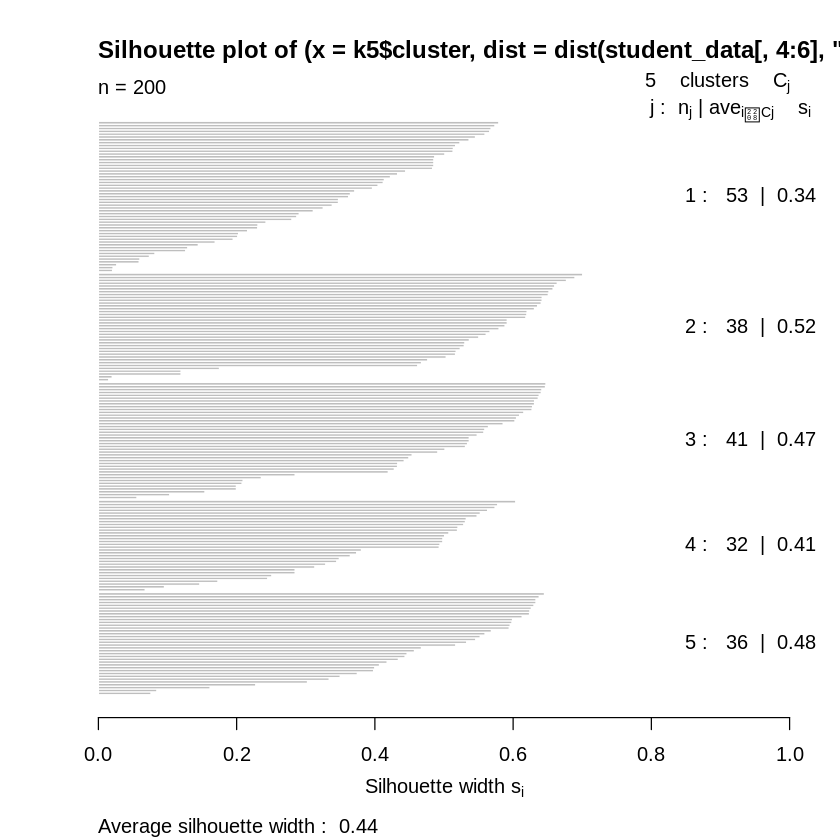

In [42]:
k5<-kmeans(student_data[,4:6],5,iter.max=100,nstart=50,algorithm="Lloyd")
s5<-plot(silhouette(k5$cluster,dist(student_data[,4:6],"euclidean")))

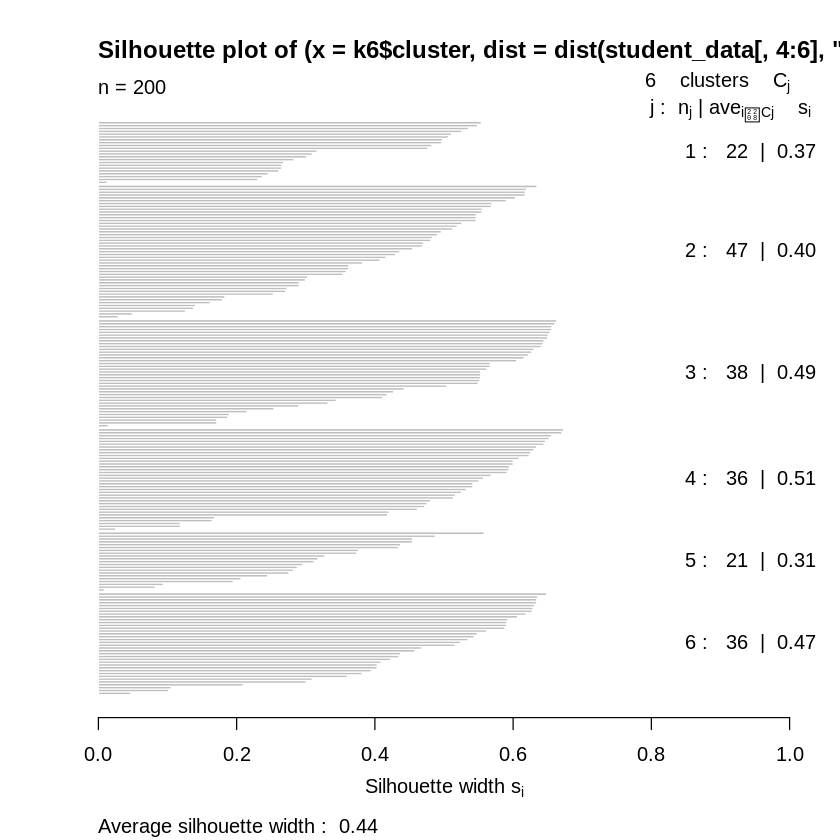

In [43]:
k6<-kmeans(student_data[,4:6],6,iter.max=100,nstart=50,algorithm="Lloyd")
s6<-plot(silhouette(k6$cluster,dist(student_data[,4:6],"euclidean")))

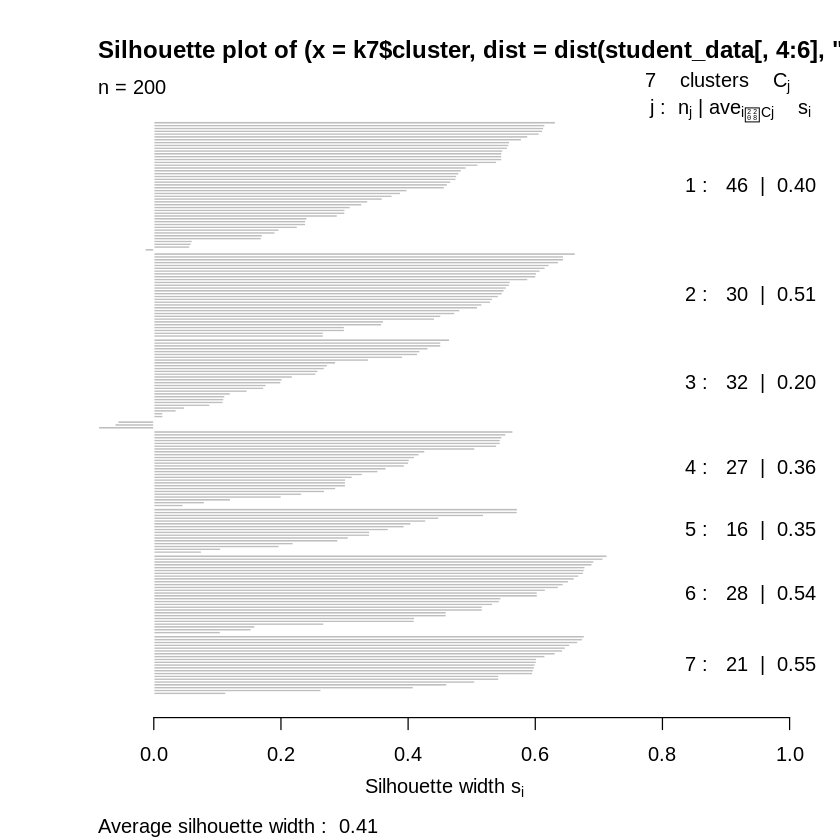

In [44]:
k7<-kmeans(student_data[,4:6],7,iter.max=100,nstart=50,algorithm="Lloyd")
s7<-plot(silhouette(k7$cluster,dist(student_data[,4:6],"euclidean")))

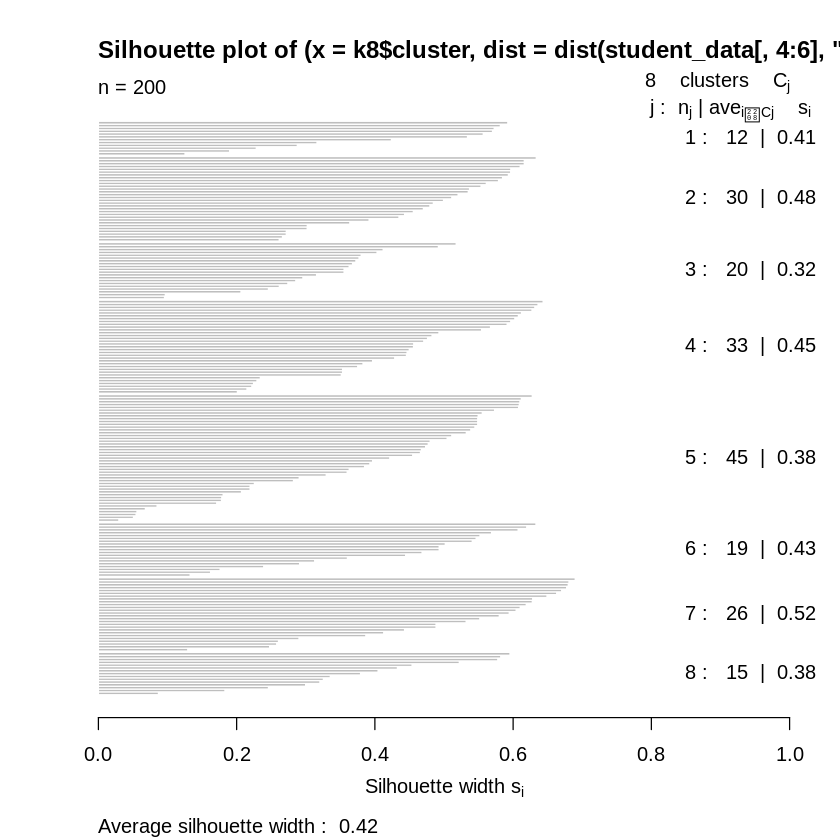

In [45]:
k8<-kmeans(student_data[,4:6],8,iter.max=100,nstart=50,algorithm="Lloyd")
s8<-plot(silhouette(k8$cluster,dist(student_data[,4:6],"euclidean")))

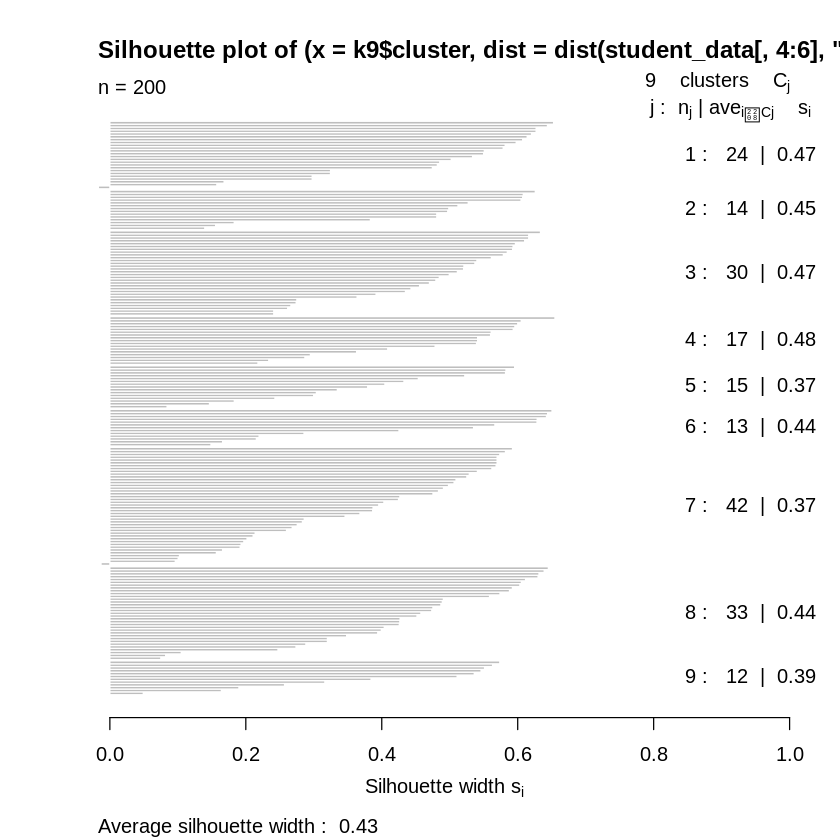

In [46]:
k9<-kmeans(student_data[,4:6],9,iter.max=100,nstart=50,algorithm="Lloyd")
s9<-plot(silhouette(k9$cluster,dist(student_data[,4:6],"euclidean")))

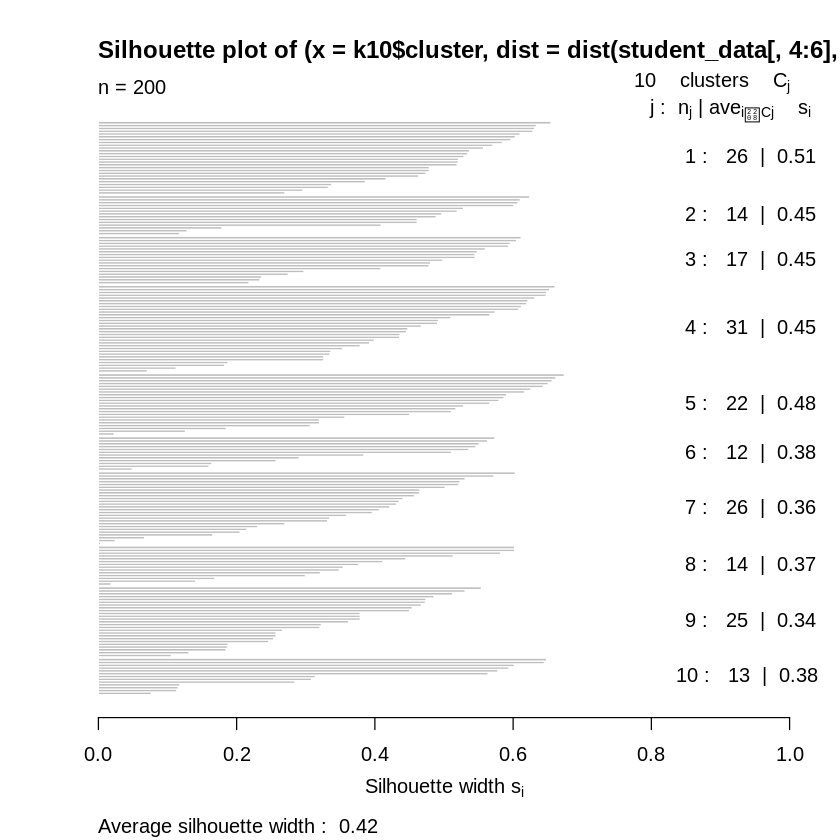

In [47]:
k10<-kmeans(student_data[,4:6],10,iter.max=100,nstart=50,algorithm="Lloyd")
s10<-plot(silhouette(k10$cluster,dist(student_data[,4:6],"euclidean")))

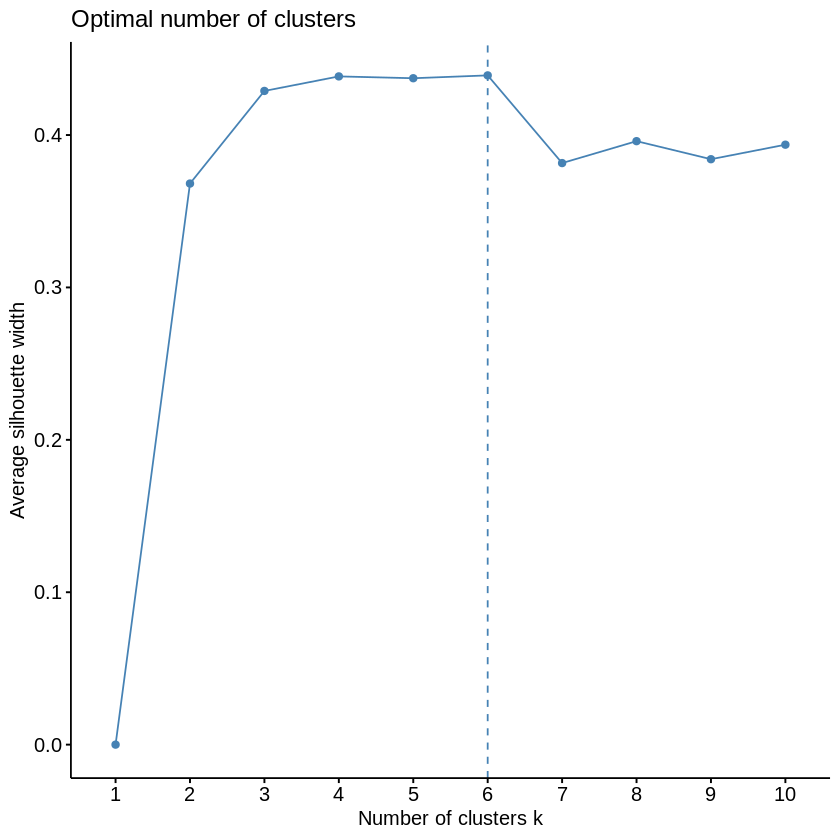

In [51]:
library(NbClust)
library(factoextra)

fviz_nbclust(student_data[,4:6], kmeans, method = "silhouette")

In [48]:
install.packages("NbClust")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [49]:
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘corrplot’, ‘viridis’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




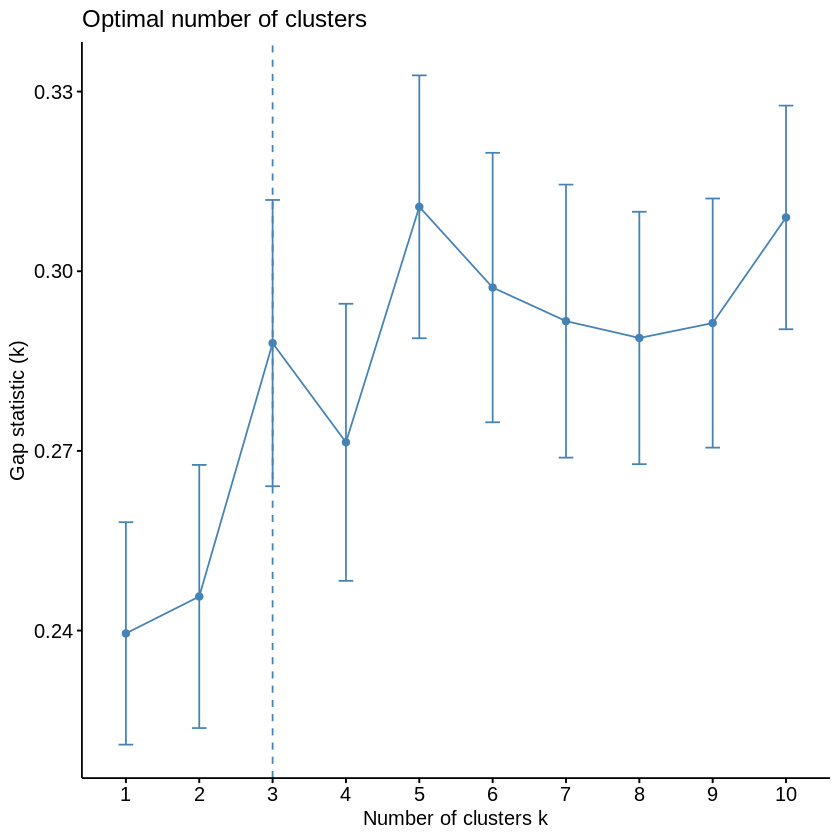

In [52]:
set.seed(125)
stat_gap <- clusGap(student_data[,4:6], FUN = kmeans, nstart = 25,
            K.max = 10, B = 50)
fviz_gap_stat(stat_gap)

In [53]:
k6<-kmeans(student_data[,4:6],6,iter.max=100,nstart=50,algorithm="Lloyd")
k6

K-means clustering with 6 clusters of sizes 21, 36, 47, 38, 36, 22

Cluster means:
       Age ParentsAnnualIncome.L. HSCMarks
1 18.71429              19.952381 78.47619
2 18.44444               7.777778 63.69444
3 18.65957               5.829787 77.51064
4 18.26316               8.236842 90.71053
5 18.47222              26.416667 65.77778
6 18.72727              30.590909 85.13636

Clustering vector:
  [1] 4 4 3 3 2 4 4 3 3 2 3 3 2 2 4 4 3 4 3 2 2 4 3 2 3 3 4 4 4 3 4 4 4 3 3 3 4
 [38] 2 4 4 3 3 4 2 4 2 3 2 4 4 3 4 4 3 4 4 3 3 3 3 3 2 2 3 2 3 4 2 4 2 2 3 2 2
 [75] 2 3 3 2 2 2 3 3 3 2 3 3 4 4 3 2 2 3 3 3 3 3 3 4 4 1 1 6 6 1 5 3 5 5 2 6 5
[112] 5 3 1 5 6 4 4 6 6 2 2 3 5 2 5 6 1 5 5 5 1 6 2 1 1 5 4 6 1 5 5 5 5 6 5 6 1
[149] 1 5 2 5 5 5 5 5 6 5 4 1 6 6 5 6 5 5 5 2 1 5 5 4 6 5 5 4 6 1 3 5 6 1 1 1 1
[186] 5 6 2 6 1 5 4 2 2 3 1 6 1 6 5

Within cluster sum of squares by cluster:
[1]  734.4762 1106.7500 1264.9362 1098.0526 1061.9444  976.2727
 (between_SS / total_SS =  85.8 %)

Available compone

In [54]:
pcclust=prcomp(student_data[,4:6],scale=FALSE) #principal component analysis
summary(pcclust)

pcclust$rotation[,1:2]

Importance of components:
                           PC1    PC2     PC3
Standard deviation     10.9485 9.9591 1.05657
Proportion of Variance  0.5444 0.4505 0.00507
Cumulative Proportion   0.5444 0.9949 1.00000

,PC1,PC2
Age,0.004827812,0.007746504
ParentsAnnualIncome.L.,0.632280697,0.774686481
HSCMarks,-0.774724346,0.632298068


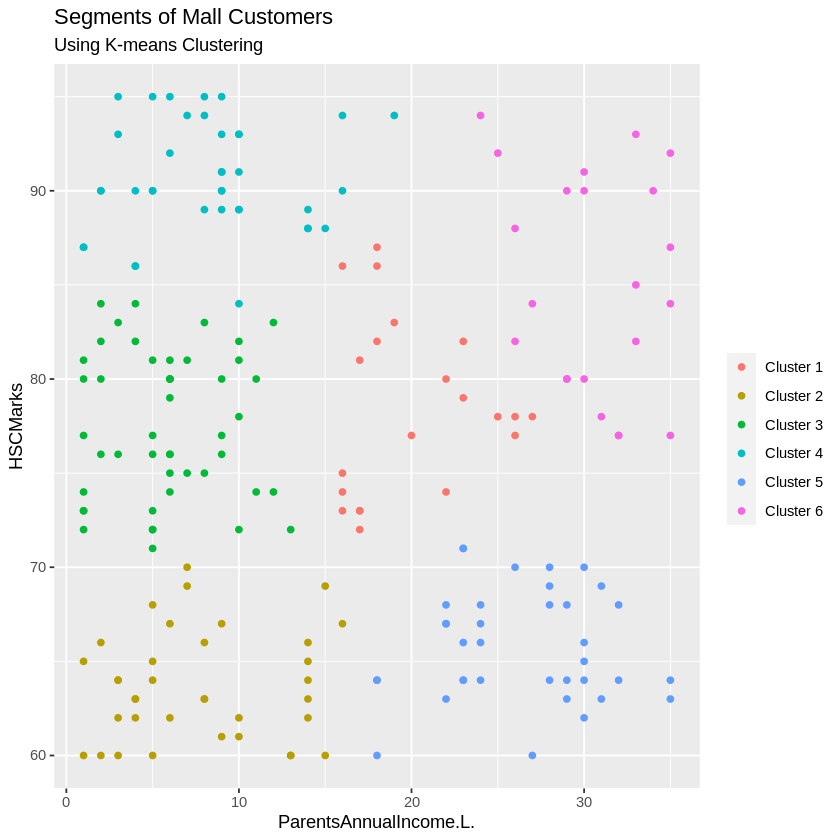

In [55]:
set.seed(1)
ggplot(student_data, aes(x =ParentsAnnualIncome.L., y = HSCMarks)) + 
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
              breaks=c("1", "2", "3", "4", "5","6"),
              labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

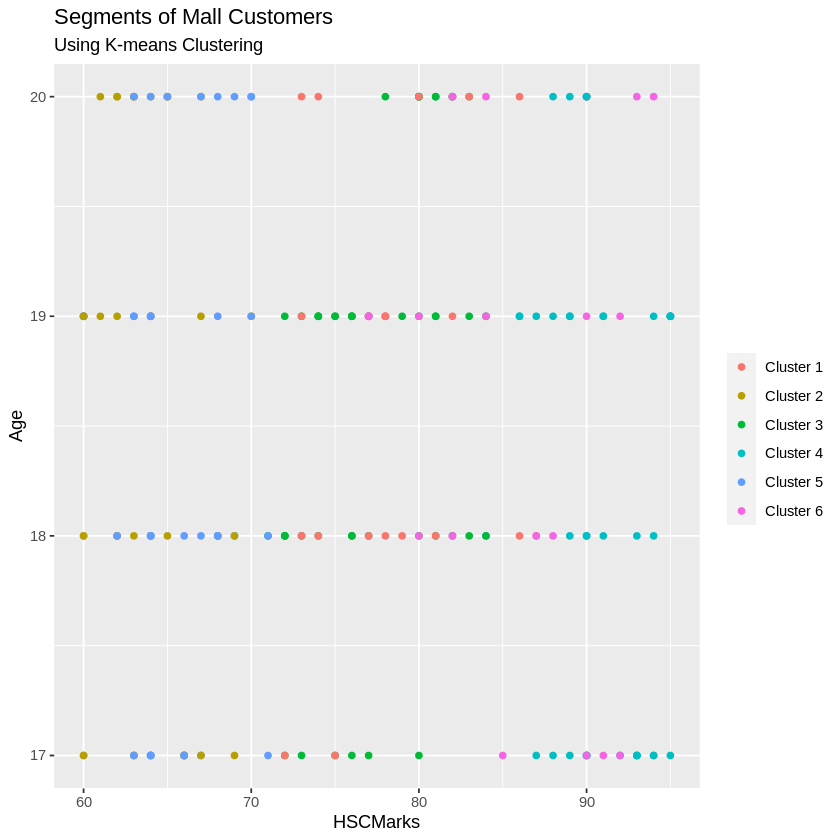

In [56]:
ggplot(student_data, aes(x =HSCMarks, y =Age)) + 
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
                      breaks=c("1", "2", "3", "4", "5","6"),
                      labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

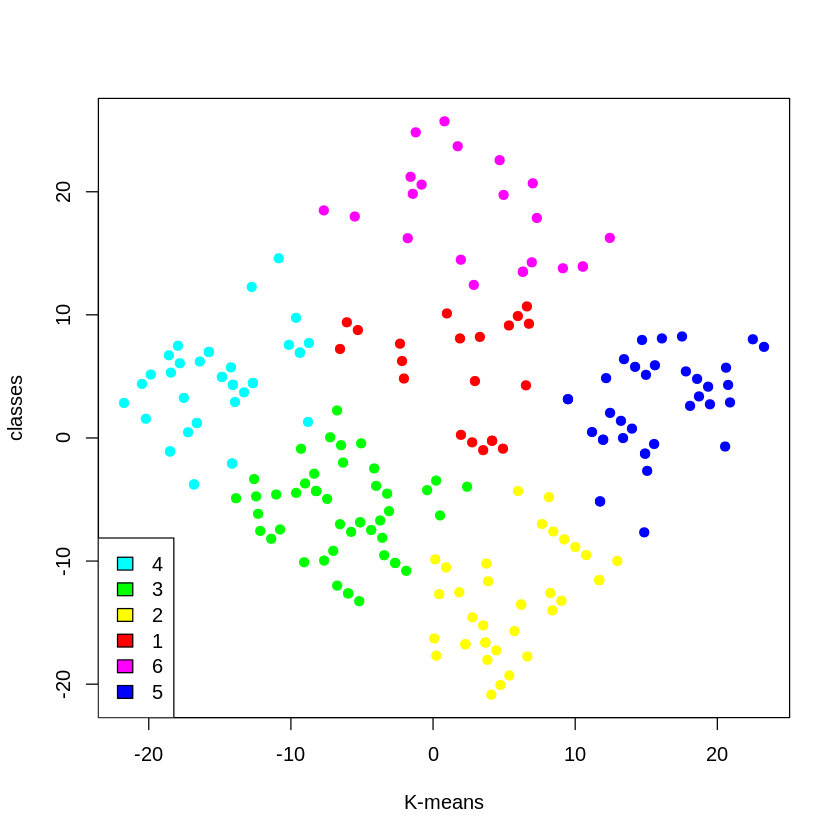

In [57]:
kCols=function(vec){cols=rainbow (length (unique (vec)))
return (cols[as.numeric(as.factor(vec))])}

digCluster<-k6$cluster; dignm<-as.character(digCluster); # K-means clusters

plot(pcclust$x[,1:2], col =kCols(digCluster),pch =19,xlab ="K-means",ylab="classes")
legend("bottomleft",unique(dignm),fill=unique(kCols(digCluster)))